# Latex export of plots
This notebook was used for creating the plots in the paper. If you run this notebook in the supplied docker container, do not run the cells `[2]` and `[6]` which require $\LaTeX$ and [tikzmagic](https://github.com/xblahoud/tikzmagic) installed in the system. We did not supply them to keep the size of the docker conatiner reasonably small.

In [1]:
from ltlcross_wrapper import ResAnalyzer

In [ ]:
import tikzmagic

def display_tikz(tikzcode, scale=1):
    preamble = r"""\usepackage{pgfplots}
\usepackage{xcolor}
"""
    return tikzmagic.tikzmagic.tikz(f"-s={scale} -b=0 -x='{preamble}'", tikzcode)

In [2]:
b = ResAnalyzer(f"data/random_nd.csv", cols=["states","time","acc","transitions"])
b.compute_best(["yes.owl#s","yes.owl#a"],"yes.owl#best")
names = {
    "yes.owl#best" : "Owl+best+Spot",
    "yes.seminator#def" : "Seminator 2"
}

above = len(b.smaller_than("yes.owl#best","yes.seminator#def"))
below = len(b.smaller_than("yes.seminator#def","yes.owl#best"))
nodes = f"""%
\\draw[gray] (0,0) -- 
  node[above, sloped, magenta, pos=.85, font=\\tiny, align=center] {{Owl better\\\\in {above} cases}}
  node[below, sloped, magenta, pos=.85, font=\\tiny, align=center, inner sep=1.5pt] {{Seminator better\\\\in {below} cases}}
(40,40);
"""

In [3]:
b.values.rename(columns=names, level=1, inplace=True)
args = {
    "width" : "5.5cm",
    "height" : "5cm",
}

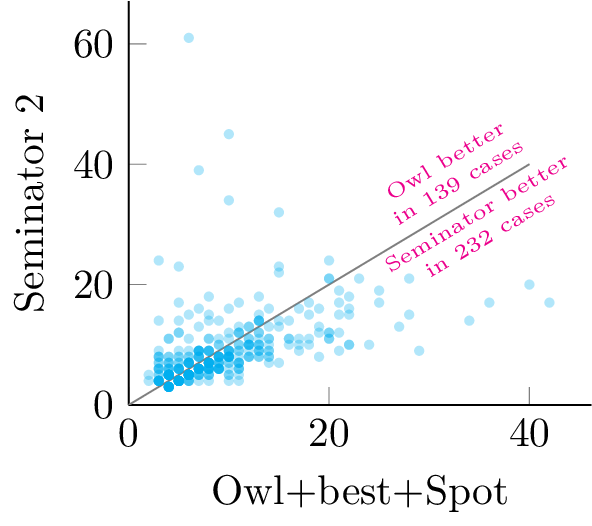

In [4]:
tikzcode = b.pgfplots_scatter_plot("Owl+best+Spot","Seminator 2", marks_dict={"fill" : "cyan", "fill opacity" : .3}, tikz_hook=nodes, diagonal=False, **args)
!mkdir -p ../fig
print(tikzcode, file=open("../fig/owl_sem_nd.tikz", "w"))

In [ ]:
display_tikz(tikzcode)